In [28]:

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm,multivariate_normal
import pandas as pd

# Visualising surfaces

In [29]:
x=np.arange(-10,10,0.1)
fx=norm.pdf(x,0,2) #Normal pdf buildin in scipy
plt.plot(x,fx)

# Creating meshgrid and plotting surface

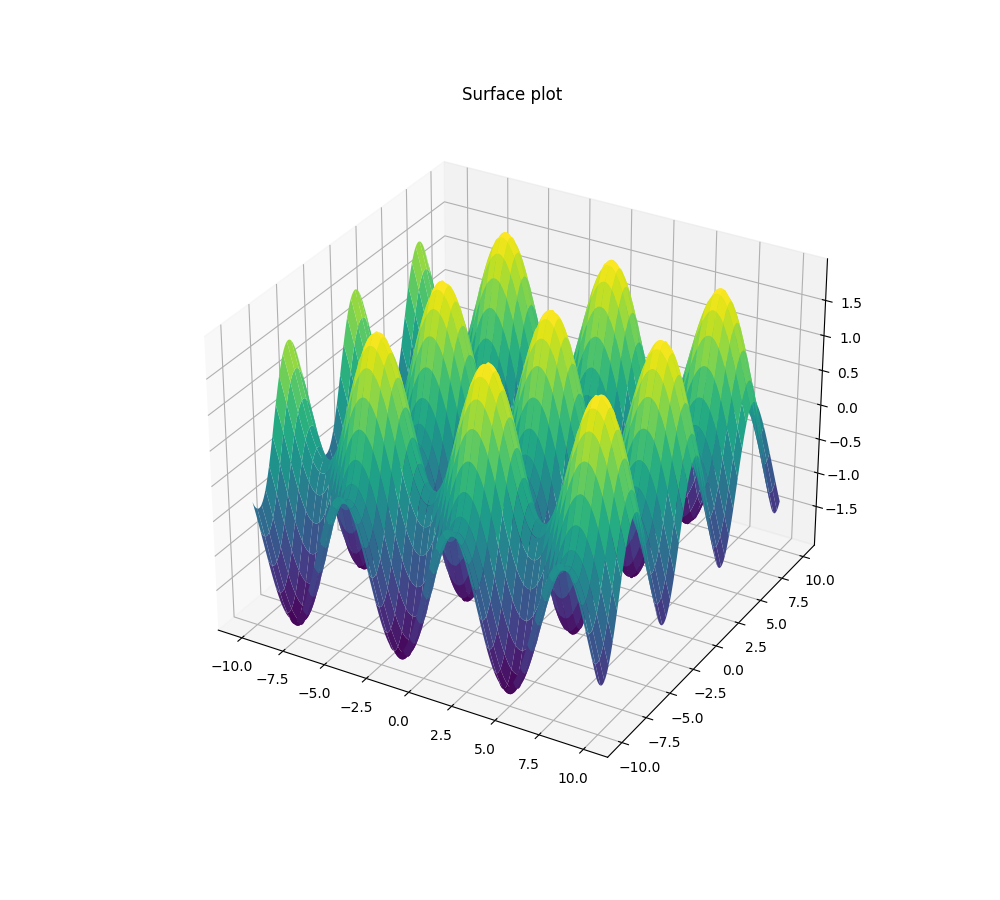

In [30]:
fig = plt.figure(figsize =(10, 9))
ax = fig.add_subplot(111, projection='3d')
x=np.arange(-10,10,0.1)
y=np.arange(-10,10,0.1)
x,y=np.meshgrid(x,y)
z=np.sin(x)+np.cos(y)
#z=np.exp(-(x**2+y**2)) # Try it.

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()




#Task 1: Run and follow through the code above.
1. Create a meshgrid of $x$ and $y$ ranging from -10 to 10 in stepssize of 0.15
2. Given that the CRV's $x$ and $y$ are both described by normal pdf. Mean of $x$ is 2.5 and variance of $x$ is 1.2. Mean of $y$ is 0 and variance is 6.
3. Construct the surface plot of the bivariate normal pdf.

#Task 2: Distribution of means (Central Limit Theorem)
Step 1: The dataset  "`Height_dummy_A3.xlsx`" given contains the data on height of 6500 individuals from a population. Load the data and generate the histrogram to have an idea of the distribution of the height in the population.

Step 2: Determine the mean and variance of the distribution.

Step 3: Collect a sample of 100 heights  randomly selected from the data set and calculate its mean.

Step 4: Repeat this Step 3 for multiple times (n) and in each case, determine the mean of that 100 set.

Step 5: Look at the distribution of the means by plotting the histogram.

#The distribution of the means approaches normal as the number of sample means (n) approaces infinity. This is the Central Limit Theorem.

### Task 1

In [31]:
x = np.arange(-10, 10, 0.15)
y = np.arange(-10, 10, 0.15)
x, y = np.meshgrid(x, y)

In [32]:
mean = [2.5, 0]
covariance_matrix = [[1.2, 0], [0, 6]]

In [33]:
bivariate_normal = multivariate_normal(mean=mean, cov=covariance_matrix)

In [34]:
z = np.zeros_like(x)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z[i, j] = bivariate_normal.pdf([x[i, j], y[i, j]])

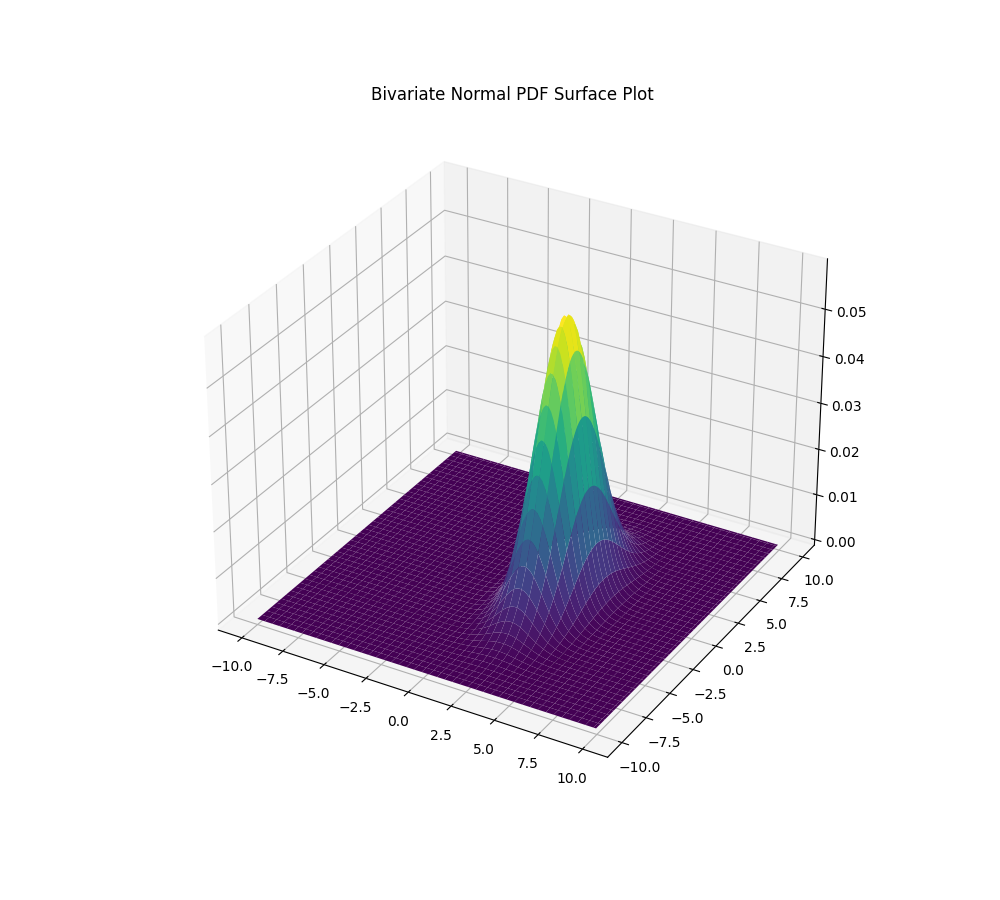

In [35]:
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title('Bivariate Normal PDF Surface Plot')
plt.show()

### Task 2

In [36]:
df = pd.read_excel("Height_dummy_A3.xlsx")
df.head()

,Sl,Height in cm
0,1,173.06
1,2,166.67
2,3,170.17
3,4,175.90
4,5,174.76


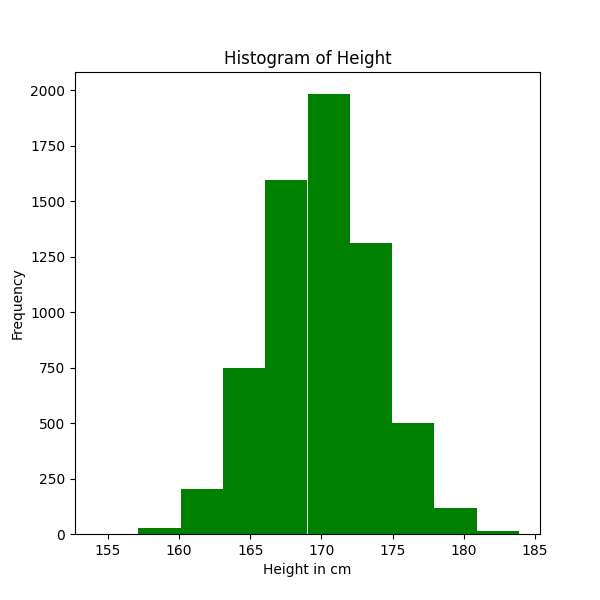

In [38]:
fig = plt.figure(figsize =(6, 6))
ax = fig.add_subplot(111)


plt.hist(df['Height in cm'], color='green')

plt.title('Histogram of Height')
plt.xlabel('Height in cm')
plt.ylabel('Frequency')

plt.show()

In [42]:
print(f"mean : {df['Height in cm'].mean()}\nvariance : {df['Height in cm'].var()}")

mean : 170.01915692307693
variance : 14.651596796420755


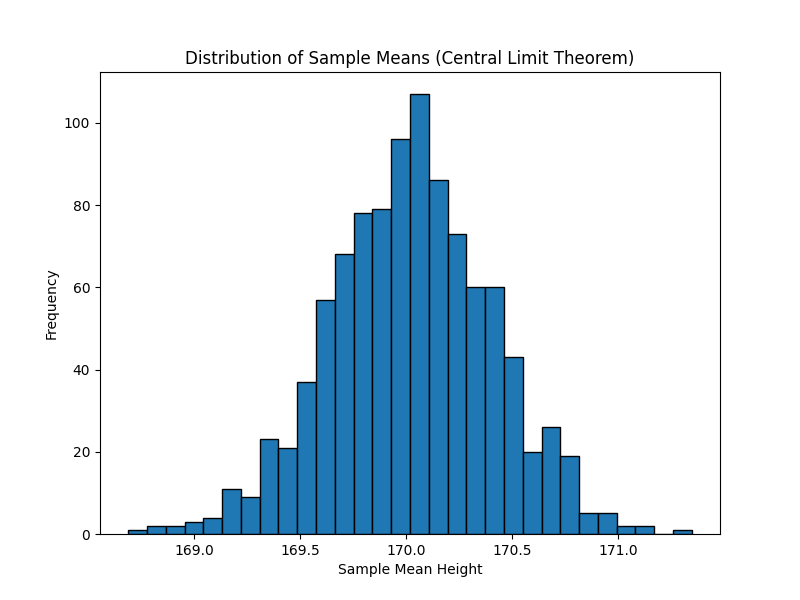

In [47]:
sample_size = 100

num_samples = 1000

sample_means = []

for _ in range(num_samples):
    sample = df['Height in cm'].sample(sample_size, replace=True)
    sample_means.append(sample.mean())

plt.figure(figsize=(8, 6))
plt.hist(sample_means, bins=30, edgecolor='black')
plt.xlabel('Sample Mean Height')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means (Central Limit Theorem)')
plt.show()